Hola **Elias**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final

#### Descompocion de la tarea.
El objetivo de este proyecto es: 
- Llevar a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
  - Esto con la finalidad de poder optimizar las decisiones empresariales y poder aumentar la rentabilidad y valor de la misma.
- Prueba las hipótesis estadísticas
  - a reserva que el area interesada tenga necesidades de informacion particulares se sugieren las siguientes hipotesis y analisis
    - Hay una mayor cantidad de llamadas internas que externas.
    - La mayoria de las llamadas se conectaron (es decir no son llamadas perdidas)
    - Las llamadas internas tienen una duracion mayor con respecto a las externas


Esto utilizando dos datasets sobre el uso del servicio de telefonía virtual CallMeMaybe.

Estos data sets son:

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, incluir esta introducción deja claro el que y cómo se realizará el proyecto
</div>

### Links de extras

- Se Generaron los Dashboars sugeridos en tableau:  https://public.tableau.com/views/ProyectoFinal_17433787005810/Dashboard1
- Link del PDF: https://github.com/hukitan/tripleten/blob/main/Proyectos_en_desarrollo/Proyecto%20Final/proyecto%20final.pdf
  (Note que a veces no carga todo el pdf de manera inicial y es necesario pulsar en 'More Pages')

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Así está muy bien! Haría falta hacer los cambios en la presentación con las sugerencias mencionadas más abajo y además, debes apoyarte más en los cálculos y gráficas que realices en tu notebook ya que debes exponer esos hallazgos, en este caso tu presentación sólo tiene los dos primeros gráficos y no menciona nada sobre la diferencia entre los grupos de operadores
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

In [2]:
telco_ds = pd.read_csv('Datasets/telecom_dataset_us.csv')
telco_ds['date'] = pd.to_datetime(telco_ds['date'])
looks(telco_ds)

Se ejecuta la descripción de los datos:
              user_id                                 date direction internal  \
count    53902.000000                                53902     53902    53785   
unique            NaN                                  NaN         2        2   
top               NaN                                  NaN       out    False   
freq              NaN                                  NaN     31917    47621   
mean    167295.344477  2019-10-23 01:00:32.191755520+03:00       NaN      NaN   
min     166377.000000            2019-08-02 00:00:00+03:00       NaN      NaN   
25%     166782.000000            2019-10-04 00:00:00+03:00       NaN      NaN   
50%     167162.000000            2019-10-28 00:00:00+03:00       NaN      NaN   
75%     167819.000000            2019-11-14 00:00:00+03:00       NaN      NaN   
max     168606.000000            2019-11-28 00:00:00+03:00       NaN      NaN   
std        598.883775                                  NaN       NaN 

In [3]:
telco_ds[telco_ds.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


In [4]:
client_ds = pd.read_csv('Datasets/telecom_clients_us.csv')

client_ds['date_start'] = pd.to_datetime(client_ds['date_start'])

looks(client_ds)

Se ejecuta la descripción de los datos:
              user_id tariff_plan                     date_start
count      732.000000         732                            732
unique            NaN           3                            NaN
top               NaN           C                            NaN
freq              NaN         395                            NaN
mean    167431.927596         NaN  2019-09-14 16:39:20.655737600
min     166373.000000         NaN            2019-08-01 00:00:00
25%     166900.750000         NaN            2019-08-23 00:00:00
50%     167432.000000         NaN            2019-09-16 00:00:00
75%     167973.000000         NaN            2019-10-08 00:00:00
max     168606.000000         NaN            2019-10-31 00:00:00
std        633.810383         NaN                            NaN

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtyp

In [5]:
# Rellenar valores nulos
# Asumimos que si no está marcado, no es interna
telco_ds["internal"] = telco_ds["internal"].fillna(False)
# Usamos -1 para representar operador desconocido
telco_ds["operator_id"] = telco_ds["operator_id"].fillna(-1)
# Convertir internal a booleano
telco_ds["internal"] = telco_ds["internal"].astype(bool)
#segundos a minutos 
telco_ds['call_duration_m'] = telco_ds['call_duration'] / 60
# renombramos de bolenao a texto
telco_ds['internal'] = telco_ds['internal'].replace(
    {True: 'Interno', False: 'Externo'})

/tmp/ipykernel_9945/3116805750.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_ds["internal"] = telco_ds["internal"].fillna(False)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

#### No se encuentran particularidades relevantes en los datos, a pesar de de encontrar duplicados aparentemente hacen referencia a distintas llamadas. Por lo que se desestima como dato de relevancia.

#### Se hacen las converciones y relleno de NA encontrados en telco_ds

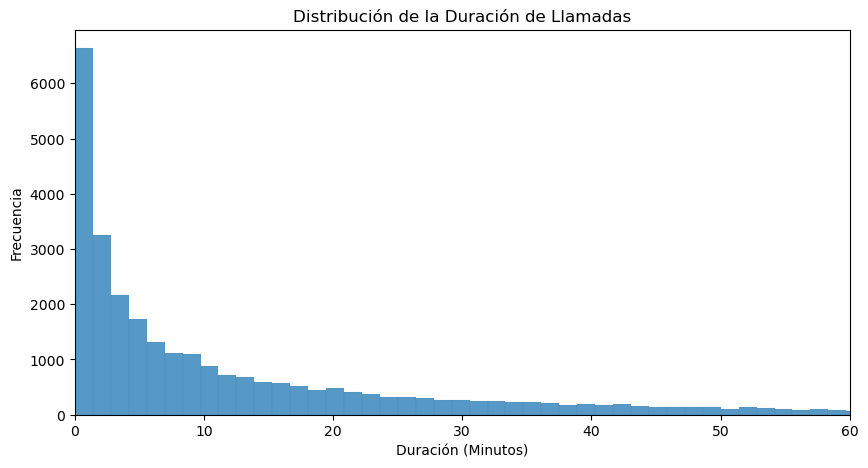

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(telco_ds[telco_ds["call_duration_m"] > 0]["call_duration_m"])
# Para evitar sesgo visual
plt.xlim(0, 60)
plt.title("Distribución de la Duración de Llamadas")
plt.xlabel("Duración (Minutos)")
plt.ylabel("Frecuencia")
plt.show()

#### Se observa que la mayoria de las llamadas tienen una duracion de aproximadamente menor a 10 minutos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, cuando se tiene datos con ID de usuarios o datos muy granulares lo mejor es analizar de manera general las métricas utilizando gráficas cómo el histograma presentado
</div>

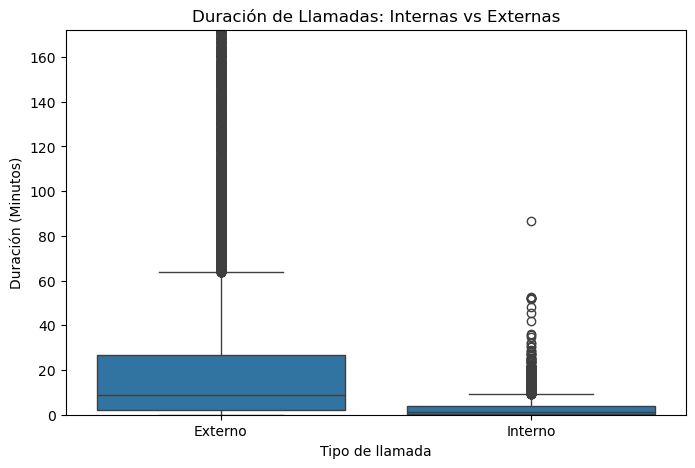

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=telco_ds["internal"],
            y=telco_ds[telco_ds["call_duration_m"] > 0]["call_duration_m"])
plt.ylim(0, telco_ds["call_duration_m"].quantile(0.99))
plt.title("Duración de Llamadas: Internas vs Externas")
plt.xlabel("Tipo de llamada")
plt.ylabel("Duración (Minutos)")
plt.show()

#### Con base en la grafica se suguiere que las llamadas externas duran mas que las internas

Tambien observamos que existen algunos valores outlier que denotan una duracion mayor de las llamadas.

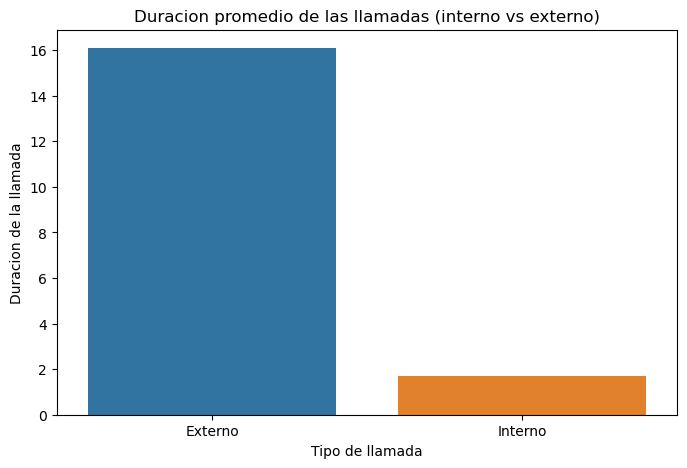

In [8]:
duracion_llamadas = telco_ds.groupby(
    'internal')['call_duration_m'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=duracion_llamadas, x='internal',
            y='call_duration_m', hue='internal', errorbar='sd')
plt.title('Duracion promedio de las llamadas (interno vs externo)')
plt.xlabel('Tipo de llamada')
plt.ylabel('Duracion de la llamada')
plt.show()

#### Visualmente se observan diferencias en la duracion total y promedio de las llamdas, a continuacion lo corroboramos con una prueba estadistica.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cada gráfica debe venir acompañada de su respectivo comentario con la interpretación para que el proceso de análisis sea más claro
</div>

In [9]:
from scipy.stats import ttest_ind

# Filtrar llamadas internas y externas
internas = telco_ds[telco_ds["internal"]
                    == 'Interno']["call_duration"]
externas = telco_ds[telco_ds["internal"]
                    == 'Externo']["call_duration"]

# Prueba t de Student
t_stat, p_value = ttest_ind(internas, externas, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa: las llamadas internas y externas tienen duraciones diferentes.")
    if internas.mean() > externas.mean():
        print("📌 Las llamadas internas tienen una duración mayor en promedio.")
    else:
        print("📌 Las llamadas externas tienen una duración mayor en promedio.")
else:
    print("No hay una diferencia significativa en la duración de llamadas internas y externas.")

T-statistic: -46.96548101210464, P-value: 0.0
Existe una diferencia estadísticamente significativa: las llamadas internas y externas tienen duraciones diferentes.
📌 Las llamadas externas tienen una duración mayor en promedio.


#### Con base en las graficas y corroborado en la prueba estadisitca confirmamos la hiptesis que las llamadas externas duran mas que las internas.

### Procedemos ahora a determinar los operadores mas ineficaces:

In [10]:
# Agrupar por operador y calcular el porcentaje de llamadas perdidas
operador_ineficaz = telco_ds.groupby("operator_id").agg(
    total_llamadas=("calls_count", "sum"),
    llamadas_perdidas=("is_missed_call", "sum"),
    duracion_promedio=("call_duration_m", "mean")
)

# Calcular el porcentaje de llamadas perdidas
operador_ineficaz["porcentaje_perdidas"] = (
    operador_ineficaz["llamadas_perdidas"] / operador_ineficaz["total_llamadas"]) * 100

# Ordenar de mayor a menor porcentaje de llamadas perdidas
operador_ineficaz = operador_ineficaz.sort_values(
    by="porcentaje_perdidas", ascending=False)

p50 = operador_ineficaz["porcentaje_perdidas"].quantile(0.50)  # Mediana (50%)
p90 = operador_ineficaz["porcentaje_perdidas"].quantile(0.90)  # Peor 10%

# Clasificar operadores en tres grupos en funcion de la proporcion de llamadas perdidas
operador_ineficaz["categoria"] = "Normal"
operador_ineficaz.loc[operador_ineficaz["porcentaje_perdidas"]
                      <= p50, "categoria"] = "Eficaz"
operador_ineficaz.loc[operador_ineficaz["porcentaje_perdidas"]
                      >= p90, "categoria"] = "Ineficaz"


# Mostrar los operadores ineficaces detectados
operador_ineficaz[operador_ineficaz["categoria"] == "Ineficaz"].head(10)

,total_llamadas,llamadas_perdidas,duracion_promedio,porcentaje_perdidas,categoria
operator_id,,,,,
941826.0,1,1,0.0,100.0,Ineficaz
937872.0,1,1,0.0,100.0,Ineficaz
885682.0,3,3,0.0,100.0,Ineficaz
914272.0,1,1,0.0,100.0,Ineficaz
970258.0,1,1,0.0,100.0,Ineficaz
924572.0,1,1,0.0,100.0,Ineficaz
914626.0,1,1,0.0,100.0,Ineficaz
937778.0,1,1,0.0,100.0,Ineficaz
958458.0,1,1,0.0,100.0,Ineficaz


Observamos los operadores identificados como ineficaces de manera inicial

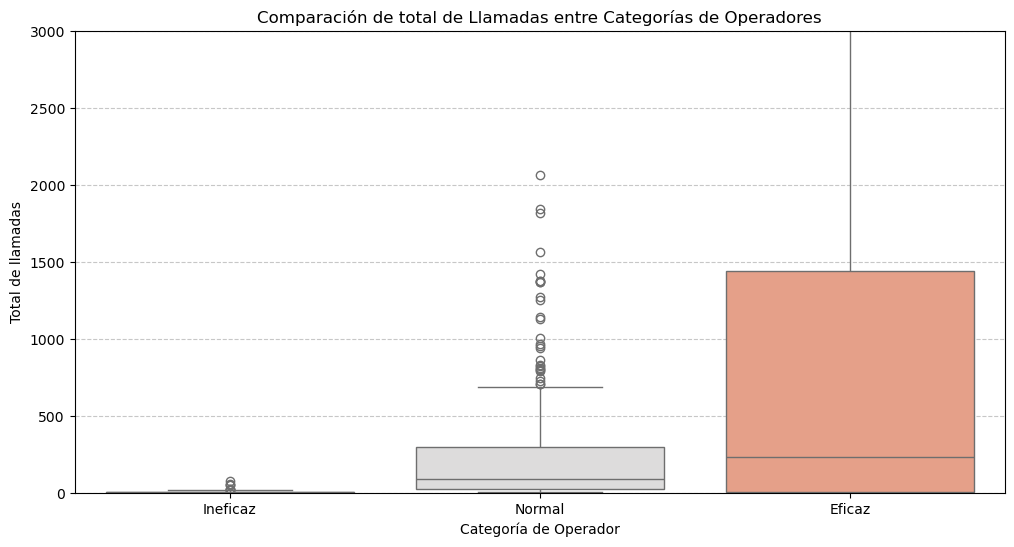

In [11]:
# Visualización de comparación entre eficaces e ineficaces
plt.figure(figsize=(12, 6))
sns.boxplot(data=operador_ineficaz, x="categoria",
            y="total_llamadas", hue="categoria", palette="coolwarm")
plt.title(
    "Comparación de total de Llamadas entre Categorías de Operadores")
plt.ylabel("Total de llamadas")
plt.xlabel("Categoría de Operador")
plt.ylim(0, 3000)  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Se observa una mayor candidad de llamadas para los operadores Eficades que para el resto.

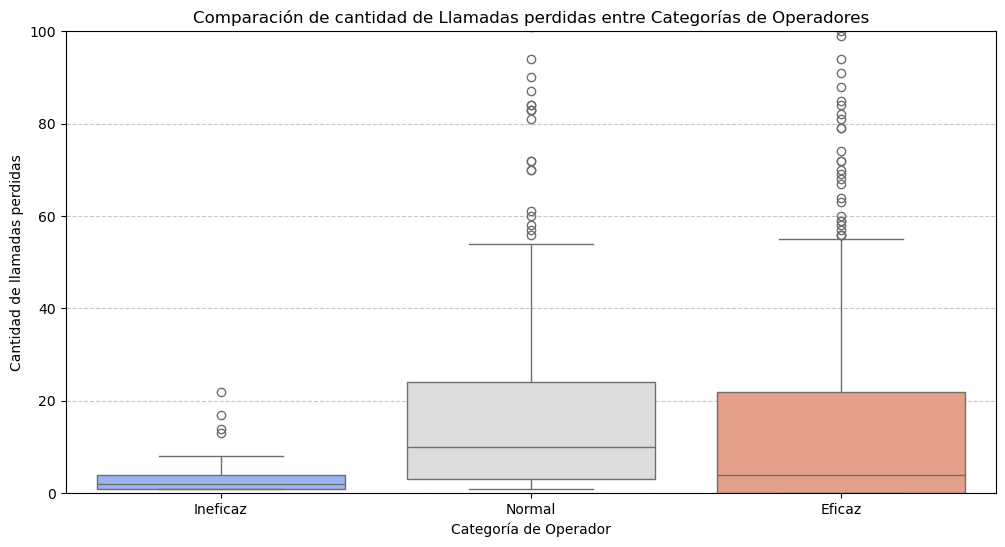

In [12]:
# Visualización de comparación entre eficaces e ineficaces
plt.figure(figsize=(12, 6))
sns.boxplot(data=operador_ineficaz, x="categoria",
            y="llamadas_perdidas", hue="categoria", palette="coolwarm")
plt.title(
    "Comparación de cantidad de Llamadas perdidas entre Categorías de Operadores")
plt.ylabel("Cantidad de llamadas perdidas")
plt.xlabel("Categoría de Operador")
plt.ylim(0, 100) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Observamos que la cantidad de llamadas perdidas es mayor aparentemente para los operadores normales que el resto del grupo, sin embargo los eficaces tienen una cantidad aparentemente cercana

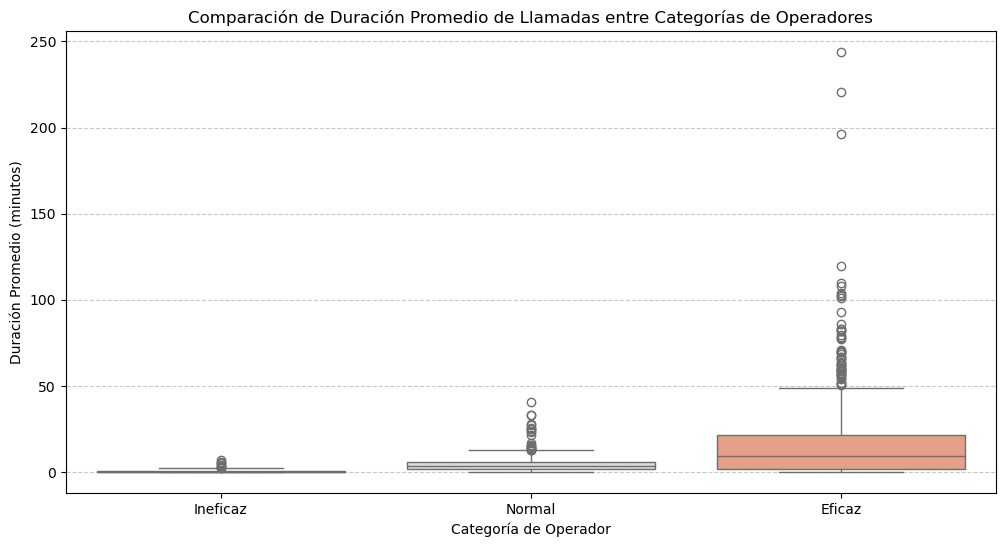

In [13]:
# Visualización de comparación entre eficaces e ineficaces
plt.figure(figsize=(12, 6))
sns.boxplot(data=operador_ineficaz, x="categoria",
            y="duracion_promedio", hue="categoria", palette="coolwarm")
plt.title(
    "Comparación de Duración Promedio de Llamadas entre Categorías de Operadores")
plt.ylabel("Duración Promedio (minutos)")
plt.xlabel("Categoría de Operador")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Con esta ultima grafica se sugiere que los operadores eficaces tienen una mayor duracion promedio de llamadas

#### Al separar por percentiles identificamos tres grupos si son ineficientes, promedio o eficientes.  Para saber si existen diferencias entre estos 3 grupos es necesario emplear un ANOVA en lugar de una prueba T para evitar un error de comparación múltiple.

Se observa que los operadores ineficaces y con desempeño promedio son menores respecto a los eficaces en la duracion de llamadas.

La cantidad de llamadas perdidas entre los grupos de operadres eficientes y normales es mayor a los ineficaces.

Y finalmente observamos que los operadores eficaces tienen una mayor duracion de llamada.

Esto señala que los operadores ineficaces son los mas inactivos al atender una menor cantidad de llamadas tener una menor duracion, y eso repercute en un mayor porcentaje de llamadas perdidas ya que, por ejemplo. de una llamada que recibieron no la atendieron, esto significando una proporcion de llamadas perdidas del 100%. 

In [14]:
import pingouin as pg
pg.anova(data=operador_ineficaz, dv='total_llamadas', between='categoria')[['F','p-unc','np2']]

,F,p-unc,np2
0,5.187751,0.005723,0.009429


Observamos que existe diferencias entre el total de llamadas por tipo de operador.

Sin embargo el tamaño del efecto (eta cuadrada es muy pequeño)

In [15]:
pg.anova(data=operador_ineficaz, dv='llamadas_perdidas', between='categoria')[['F', 'p-unc', 'np2']]

,F,p-unc,np2
0,1.235991,0.290954,0.002263


Aqui obvservamos, por el contrario que no existen diferencias entre los grupos.
De igual manera el tamaño del efecto es muy pequeño


In [16]:
pg.anova(data=operador_ineficaz, dv='duracion_promedio', between='categoria')[['F', 'p-unc','np2']]

,F,p-unc,np2
0,74.479356,4.802496e-31,0.120229


Aqui vemos que efectivamente existe una diferencia considerable entre grupos para la duracion de la llamada. 
Y aunque el tamaño del efecto es reducido, se observa que es mayor al resto de las comparaciones. 

#### Realizadas las comparaciones entre grupos, corrooramos que para la duracion promedio y el total de llamadas hay una diferencia entre grupos. No asi para las llamadas perdidas.

#### Con base a las tablas anteriore, se facilita hayar a los operadores con menor actividad. Esto para permitir implementar estrategias de solucion e incrementar la eficiencia y actividad de los operadores identificados

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Determinar si un operador es ineficaz o no debe venir con el análisis de las métricas, puedes usar los percentiles para clasificar mejor si un operador es eficaz o no, pero todo esto debe ser argumento en base al análisis que realizas sobre las métricas del dataset. Una vez tengas los grupos separadores deberías comparar las diferentes métricas del dataset entre estos dos grupos y aplicar pruebas estadísticas
</div>

### Finalmente vemos la cantidad de llamdas conectadas y su proporcion

In [17]:
# Total de llamadas y llamadas perdidas
total_llamadas = telco_ds["calls_count"].sum()
llamadas_perdidas = telco_ds["is_missed_call"].sum()

# Calcular porcentaje de llamadas conectadas
porcentaje_conectadas = (
    (total_llamadas - llamadas_perdidas) / total_llamadas) * 100
print(f"📞 Porcentaje de llamadas conectadas: {porcentaje_conectadas:.2f}%")

📞 Porcentaje de llamadas conectadas: 97.34%


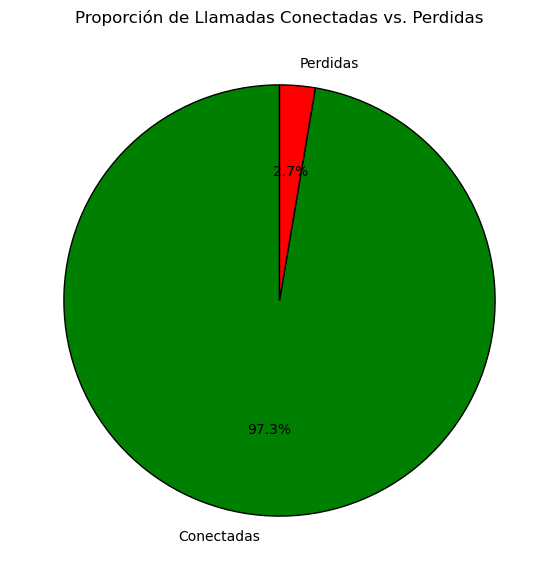

In [18]:
llamadas_conectadas = total_llamadas - llamadas_perdidas

# Datos para la gráfica
labels = ["Conectadas", "Perdidas"]
sizes = [llamadas_conectadas, llamadas_perdidas]
colors = ["green", "red"]

# Gráfica de pastel
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors,
        startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Proporción de Llamadas Conectadas vs. Perdidas")
plt.show()

#### Se observa que el 97.3% de las llamadas son enlazadas lo cual muestra una eficiencia general en ese sentido.

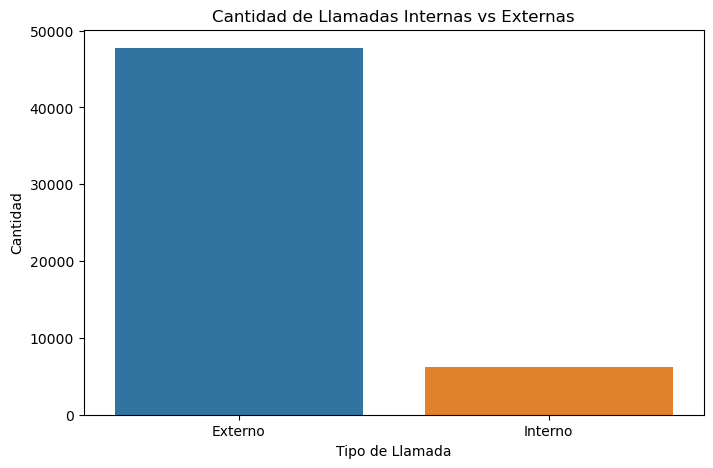

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_ds, x='internal', hue='internal')
plt.title("Cantidad de Llamadas Internas vs Externas")
plt.xlabel("Tipo de Llamada")
plt.ylabel("Cantidad")
plt.show()

#### Confirmamos de manera visual que las llamadas externas son mucho mas frecuentes que las internas. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Todo proyecto debe tener su sección de conclusiones finales, aquí deberías resumir todo los puntos más importantes del análisis realizado a lo largo de **todo** el notebook
</div>

### Conclusion:
#### Recordemos las taareas a realizar:

- Identificar operadores ineficaces
  - Esto con la finalidad de poder optimizar las decisiones empresariales y poder aumentar la rentabilidad y valor de la misma.
- Prueba las hipótesis estadísticas
  - a reserva que el area interesada tenga necesidades de informacion particulares se sugieren las siguientes hipotesis y analisis
    - Hay una mayor cantidad de llamadas internas que externas.
    - La mayoria de las llamadas se conectaron (es decir no son llamadas perdidas)
    - Las llamadas internas tienen una duracion mayor con respecto a las externas


Con base en esto hemos identificado a los operadores "ineficaces" como aquellos operadores que tienen una menor actividad, se sugiere indagar al respecto con el area encargada de los operadores, y ver porque es que estos operadores estan teniendo una menor actividad respecto a sus compañeros.

Se corrobora que las llamadas externas son mayores a las internas. y estas tienen una mayor duracion respecto a las internas. 

Se observa de igual manera que la mayoria de las llamadas fueron conectadas exitosamente